In [ ]:
import pandas as  pd
import numpy as np

import datetime
#import shap

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

from typing import *
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
!pip3 install eli5
!pip3 install shap
import eli5
import shap
from eli5.sklearn import PermutationImportance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = ['total_purchase_amt','total_redeem_amt']
date_indexs = ['week','year','month','weekday','day']
# 设置数据集路径
dataset_path = '/content/drive/MyDrive/DATA/Purchase Redemption Data/'
#读取数据
data_balance = pd.read_csv(dataset_path+'user_balance_table.csv')
data_balance.reset_index(drop=True)

data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday
data_balance.reset_index(drop=True)

total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance.reset_index(inplace=True)
total_balance=total_balance[total_balance['date']>= '2014-3-31'].reset_index(drop=True)

start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,15):
  temp = [start, np.nan, np.nan]
  testdata.append(temp)
  start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns

total_balance = pd.concat([total_balance, testdata], axis = 0)
total_balance = total_balance.reset_index(drop=True)
total_balance.reset_index(drop=True)

total_balance['date'] = pd.to_datetime(total_balance['date'], format= "%Y%m%d")
total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday

total_balance

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
0,2014-03-31,398884905.0,423852634.0,31,3,2014,14,0
1,2014-04-01,453320585.0,277429358.0,1,4,2014,14,1
2,2014-04-02,355347118.0,272612066.0,2,4,2014,14,2
3,2014-04-03,363877120.0,266605457.0,3,4,2014,14,3
4,2014-04-04,251895894.0,200192637.0,4,4,2014,14,4
5,2014-04-05,202336542.0,163199682.0,5,4,2014,14,5
6,2014-04-06,129477254.0,139576683.0,6,4,2014,14,6
7,2014-04-07,196936223.0,176966561.0,7,4,2014,15,0
8,2014-04-08,354770149.0,250015131.0,8,4,2014,15,1
9,2014-04-09,383347565.0,289330278.0,9,4,2014,15,2


# 一、 基于日期的特征


In [ ]:
# 提取所有 is特征

def get_holiday_set():
    holiday_set = set()
    # 清明节
    holiday_set = holiday_set | {datetime.date(2013,4,4), datetime.date(2013,4,5), datetime.date(2013,4,6), datetime.date(2014,4,5), datetime.date(2014,4,6), datetime.date(2014,4,7)}
    # 劳动节
    holiday_set = holiday_set | {datetime.date(2013,4,29), datetime.date(2013,4,30), datetime.date(2013,5,1), datetime.date(2014,5,1), datetime.date(2014,5,2), datetime.date(2014,5,3)}
    # 端午节
    holiday_set = holiday_set | {datetime.date(2014,5,31),datetime.date(2014,6,1),datetime.date(2014,6,2),datetime.date(2014,5,31), datetime.date(2014,6,1), datetime.date(2014,6,2)}
    # 中秋节
    holiday_set = holiday_set | {datetime.date(2013,9,19),datetime.date(2013,9,20),datetime.date(2013,9,21), datetime.date(2014,9,6), datetime.date(2014,9,7), datetime.date(2014,9,8)}
    # 国庆节
    holiday_set = holiday_set | {datetime.date(2013,10,1), datetime.date(2013,10,2), datetime.date(2013,10,3),\
                    datetime.date(2013,10,4), datetime.date(2013,10,5), datetime.date(2013,10,6),\
                    datetime.date(2013,10,7),
                    datetime.date(2014,10,1), datetime.date(2014,10,2), datetime.date(2014,10,3),\
                    datetime.date(2014,10,4), datetime.date(2014,10,5), datetime.date(2014,10,6),\
                    datetime.date(2014,10,7)}
    # 中秋节
    holiday_set = holiday_set | {datetime.date(2013,9,19), datetime.date(2013,9,20), datetime.date(2013,9,21), datetime.date(2014,9,6), datetime.date(2014,9,7), datetime.date(2014,9,8)}
    return holiday_set

def get_special_day_set():
    special_day_set = set()
    special_day_set = special_day_set | {datetime.date(2014,6,18),  datetime.date(2013,11,11), datetime.date(2013,12,12)}
    return special_day_set

def extract_is_feature(data: pd.DataFrame)->pd.DataFrame:
    total_balance = data.copy().reset_index(drop=True)
    
    # 是否是Weekend
    total_balance['is_weekend'] = 0
    total_balance.loc[total_balance['weekday'].isin((5,6)), 'is_weekend'] = 1
    # 是否是假期
    total_balance['is_holiday'] = 0
    total_balance.loc[total_balance['date'].isin(get_holiday_set()), 'is_holiday'] = 1

    # 是否是特殊日子
    total_balance['is_special_holiday'] = 0
    total_balance.loc[total_balance['date'].isin(get_special_day_set()), 'is_special_holiday'] = 1
    
    # 是否是节假日的第一天
    last_day_flag = 0
    total_balance['is_firstday_of_holiday'] = 0
    for index, row in total_balance.iterrows():
        if last_day_flag == 0 and row['is_holiday'] == 1:
            total_balance.loc[index, 'is_firstday_of_holiday'] = 1
        last_day_flag = row['is_holiday']

    # 是否是节假日的最后一天
    total_balance['is_lastday_of_holiday'] = 0
    for index, row in total_balance.iterrows():
        if row['is_holiday'] == 1 and total_balance.loc[index+1, 'is_holiday'] == 0:
             total_balance.loc[index, 'is_lastday_of_holiday'] = 1

    # 是否是节假日后的上班第一天
    total_balance['is_firstday_of_work'] = 0
    last_day_flag = 0
    for index, row in total_balance.iterrows():
        if last_day_flag == 1 and row['is_holiday'] == 0:
            total_balance.loc[index, 'is_firstday_of_work'] = 1
        last_day_flag = row['is_lastday_of_holiday']

    # 是否不用上班
    total_balance['is_work'] = 1
    total_balance.loc[(total_balance['is_holiday'] == 1) | (total_balance['is_weekend'] == 1), 'is_work'] = 0
    special_work_day_set = {datetime.date(2014,5,4), datetime.date(2014,9,28)}
    total_balance.loc[total_balance['date'].isin(special_work_day_set), 'is_work'] = 1

    # 是否明天要上班
    total_balance['is_gonna_work_tomorrow'] = 0
    for index, row in total_balance.iterrows():
        if index == len(total_balance)-1:
            break
        if row['is_work'] == 0 and total_balance.loc[index+1, 'is_work'] == 1:
             total_balance.loc[index, 'is_gonna_work_tomorrow'] = 1

    # 昨天上班了吗
    total_balance['is_worked_yestday'] = 0
    for index, row in total_balance.iterrows():
        if index <= 1:
            continue
        if total_balance.loc[index-1, 'is_work'] == 1:
             total_balance.loc[index, 'is_worked_yestday'] = 1

    # 是否是放假前一天
    total_balance['is_lastday_of_workday'] = 0
    for index, row in total_balance.iterrows():
        if index == len(total_balance)-1:
            break
        if row['is_holiday'] == 0 and total_balance.loc[index+1, 'is_holiday'] == 1:
             total_balance.loc[index, 'is_lastday_of_workday'] = 1
                
    # 是否是月初第一天
    total_balance['is_firstday_of_month'] = 0
    total_balance.loc[total_balance['day'] == 1, 'is_firstday_of_month'] = 1

    # 是否是月初第二天
    total_balance['is_secday_of_month'] = 0
    total_balance.loc[total_balance['day'] == 2, 'is_secday_of_month'] = 1

    # 是否是月初
    total_balance['is_premonth'] = 0
    total_balance.loc[total_balance['day'] <= 10, 'is_premonth'] = 1

    # 是否是月中
    total_balance['is_midmonth'] = 0
    total_balance.loc[(10 < total_balance['day']) & (total_balance['day'] <= 20), 'is_midmonth'] = 1

    # 是否是月末
    total_balance['is_tailmonth'] = 0
    total_balance.loc[20 < total_balance['day'], 'is_tailmonth'] = 1

    # 是否是每个月第1个周
    total_balance['is_first_week'] = 0
    total_balance.loc[total_balance['week'] % 4 == 1, 'is_first_week'] = 1

    # 是否是每个月第2个周
    total_balance['is_second_week'] = 0
    total_balance.loc[total_balance['week'] % 4 == 2, 'is_second_week'] = 1

    # 是否是每个月第3个周
    total_balance['is_third_week'] = 0
    total_balance.loc[total_balance['week'] % 4 == 3, 'is_third_week'] = 1

    # 是否是每个月第4个周
    total_balance['is_fourth_week'] = 0
    total_balance.loc[total_balance['week'] % 4 == 0, 'is_fourth_week'] = 1
    
    return total_balance.reset_index(drop=True)

total_balance = extract_is_feature(total_balance)

In [ ]:
def encode_weekday_data(data, feature_name = 'weekday', encoder=OneHotEncoder()):
    total_balance = data.copy()
    week_feature = encoder.fit_transform(np.array(total_balance[feature_name]).reshape(-1, 1)).toarray()
    week_feature = pd.DataFrame(week_feature,columns= [feature_name + '_Onehot_'+ str(x) for x in range(len(week_feature[0]))])
    featureWeekday = pd.concat([total_balance, week_feature], axis = 1)
    return featureWeekday


total_balance = encode_weekday_data(total_balance)

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
!wget -O /usr/local/share/fonts/Times.ttf https://drive.google.com/file/d/1jC7f8KGOnWWLuHzI5scbciI4QgWDTDRW/view?usp=sharing
fm.fontManager.ttflist += fm.createFontList(['/usr/local/share/fonts/Times.ttf'])
mpl.rc('font', family='serif')
# 画出每日总购买与赎回量的时间序列图
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 调整字体：times new roman
Titlesize=18
fontsize=12

--2021-11-28 14:13:41--  https://drive.google.com/file/d/1jC7f8KGOnWWLuHzI5scbciI4QgWDTDRW/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.251.45.110, 2607:f8b0:4004:83f::200e
Connecting to drive.google.com (drive.google.com)|142.251.45.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/usr/local/share/fonts/Times.ttf’

/usr/local/share/fo     [ <=>                ]  65.50K  --.-KB/s    in 0.01s   

2021-11-28 14:13:42 (6.36 MB/s) - ‘/usr/local/share/fonts/Times.ttf’ saved [67072]



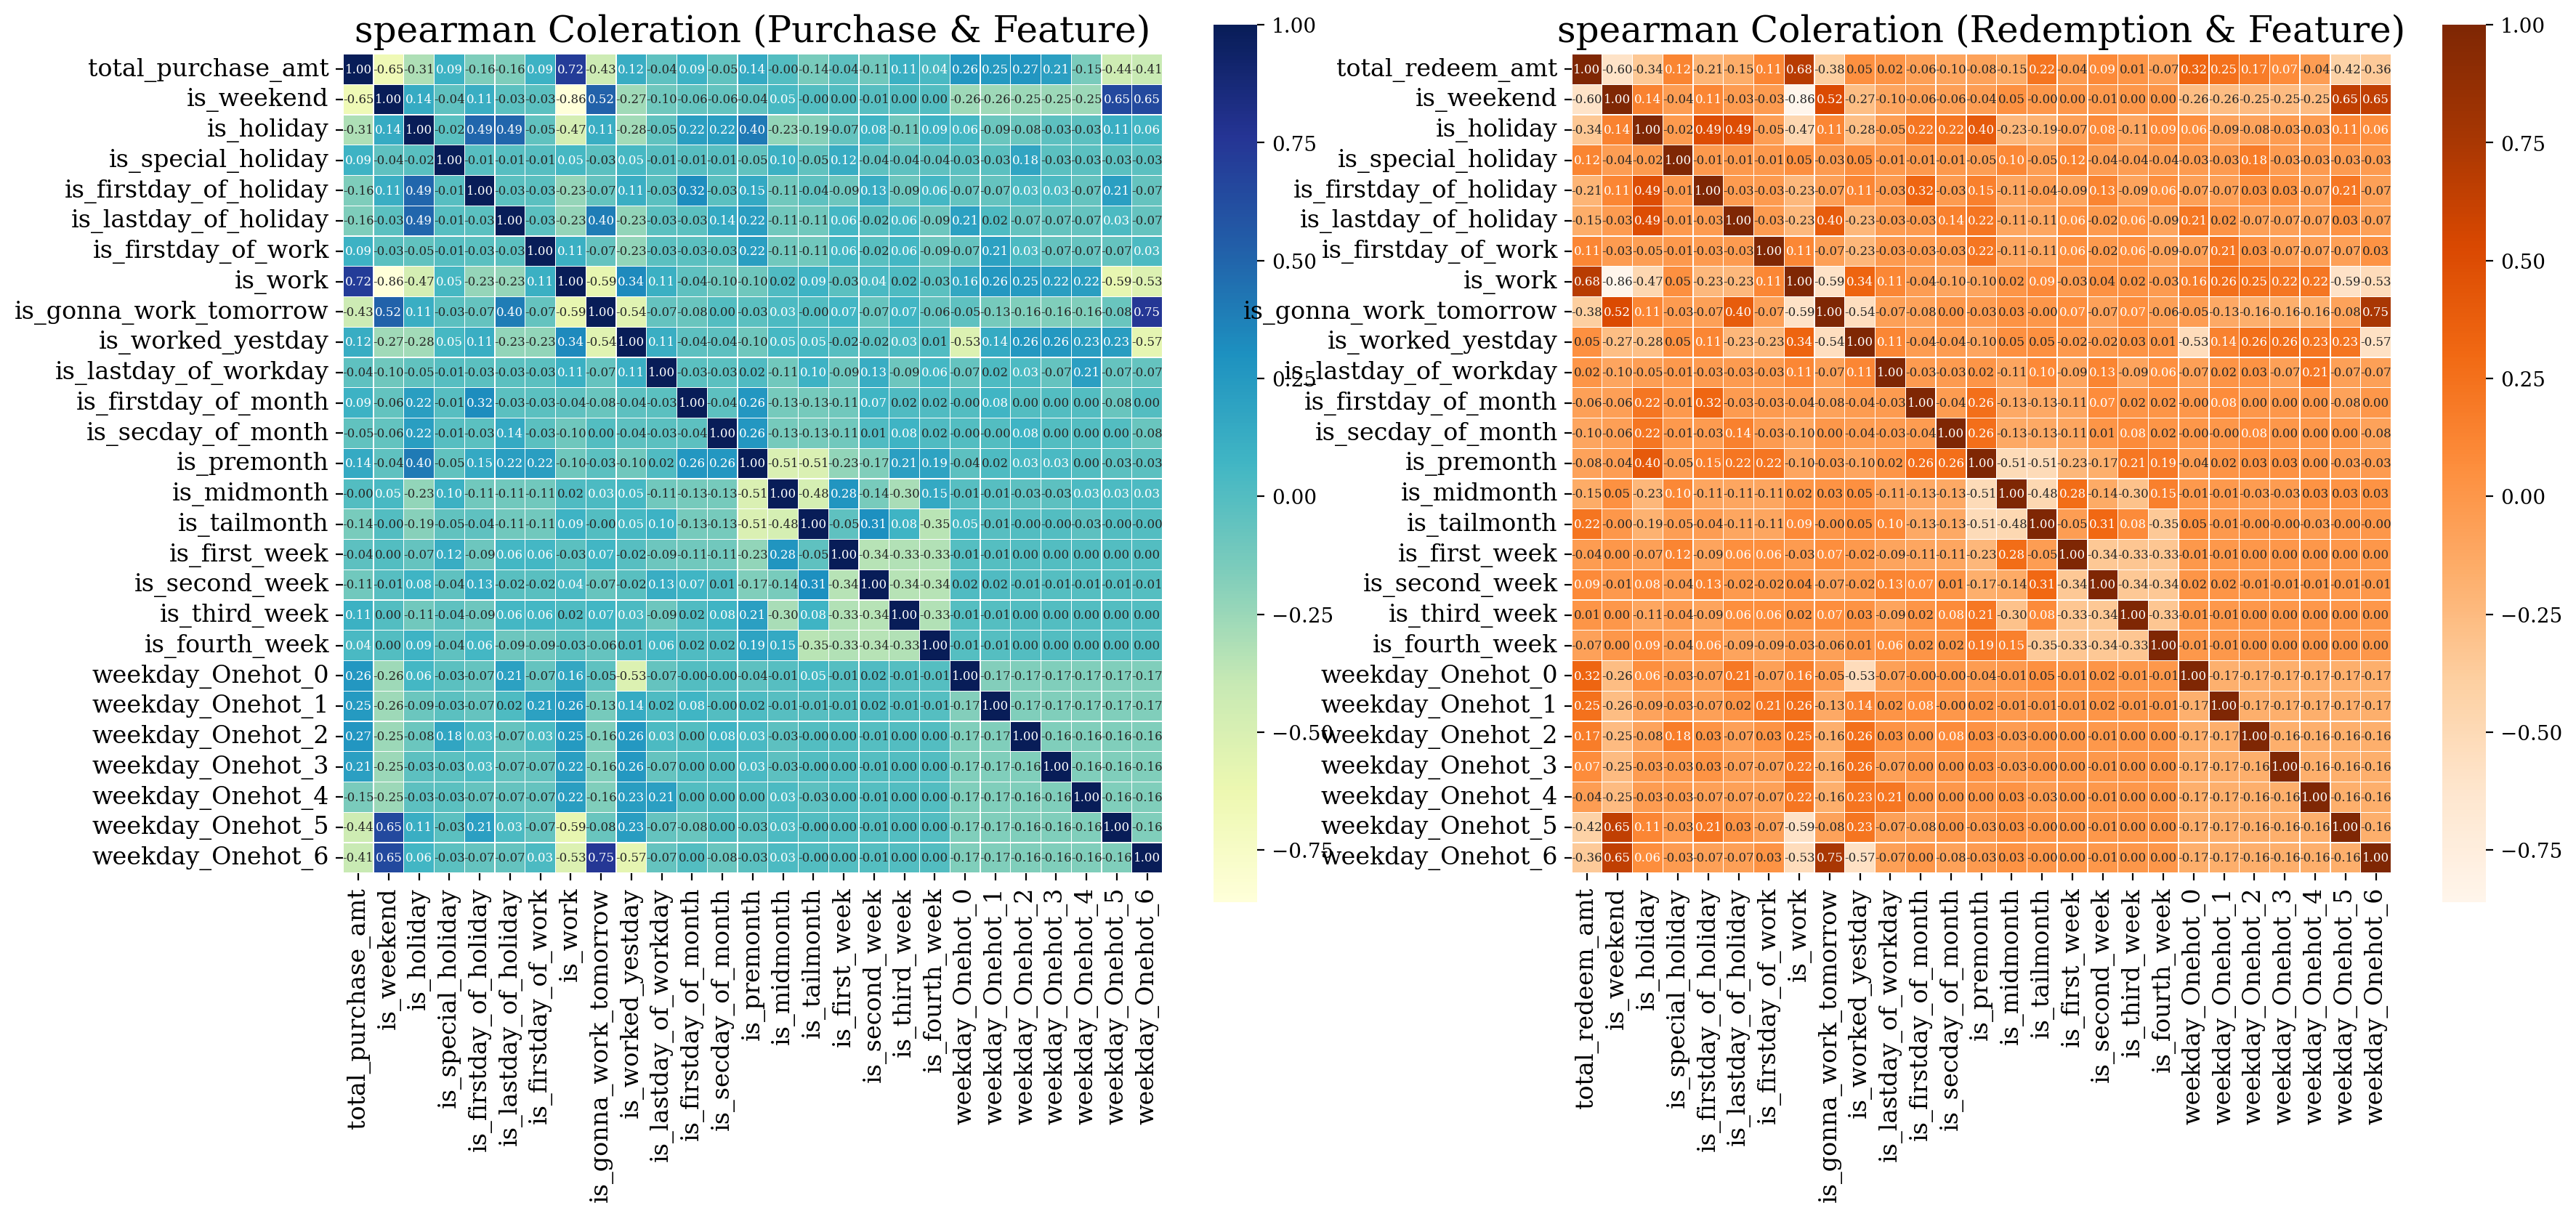

In [ ]:
def draw_correlation_heatmap(data: pd.DataFrame, way:str = 'pearson')->None:
    feature = data.copy()
    plt.figure(figsize=(20,8),dpi=200)
    plt.subplot(1,2,1)
    plt.title(way +' Coleration (Purchase & Feature)',fontsize=Titlesize)
    sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr(way),linecolor='white',
        linewidths=0.1,annot=True, square=True,fmt='.2f',annot_kws={'size':6},
        cmap="YlGnBu")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    plt.subplot(1,2,2)
    plt.title(way +' Coleration (Redemption & Feature)',fontsize=Titlesize)
    sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr(way),linecolor='white',
        linewidths=0.1,annot=True, square=True,fmt='.2f',annot_kws={'size':6},
        cmap="Oranges")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()



feature = total_balance[[x for x in total_balance.columns if x not in date_indexs]]
draw_correlation_heatmap(feature, 'spearman')

In [ ]:

temp = np.abs(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman')['total_purchase_amt'])
feature_low_correlation1 = set(temp[temp < 0.1].index)


temp = np.abs(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman')['total_redeem_amt'])
feature_low_correlation2 = set(temp[temp < 0.1].index)

feature_low_correlation = list(feature_low_correlation1 & feature_low_correlation2)



# 二、 基于时间距离的特征

In [ ]:
# 提取距离特征

def extract_distance_feature(data: pd.DataFrame)->pd.DataFrame:
    total_balance = data.copy()
    
    # 距离放假还有多少天
    total_balance['dis_to_nowork'] = 0
    for index, row in total_balance.iterrows():
        if row['is_work'] == 0:
            step = 1
            flag = 1
            while flag:
                if index - step >= 0 and total_balance.loc[index - step, 'is_work'] == 1:
                    total_balance.loc[index - step, 'dis_to_nowork'] = step
                    step += 1
                else:
                    flag = 0

    total_balance['dis_from_nowork'] = 0
    step = 0
    for index, row in total_balance.iterrows():
        step += 1
        if row['is_work'] == 1:
            total_balance.loc[index, 'dis_from_nowork'] = step
        else:
            step = 0

    # 距离上班还有多少天
    total_balance['dis_to_work'] = 0
    for index, row in total_balance.iterrows():
        if row['is_work'] == 1:
            step = 1
            flag = 1
            while flag:
                if index - step >= 0 and total_balance.loc[index - step, 'is_work'] == 0:
                    total_balance.loc[index - step, 'dis_to_work'] = step
                    step += 1
                else:
                    flag = 0

    total_balance['dis_from_work'] = 0
    step = 0
    for index, row in total_balance.iterrows():
        step += 1
        if row['is_work'] == 0:
            total_balance.loc[index, 'dis_from_work'] = step
        else:
            step = 0


    # 距离节假日还有多少天
    total_balance['dis_to_holiday'] = 0
    for index, row in total_balance.iterrows():
        if row['is_holiday'] == 1:
            step = 1
            flag = 1
            while flag:
                if index - step >= 0 and total_balance.loc[index - step, 'is_holiday'] == 0:
                    total_balance.loc[index - step, 'dis_to_holiday'] = step
                    step += 1
                else:
                    flag = 0

    total_balance['dis_from_holiday'] = 0
    step = 0
    for index, row in total_balance.iterrows():
        step += 1
        if row['is_holiday'] == 0:
            total_balance.loc[index, 'dis_from_holiday'] = step
        else:
            step = 0

    # 距离节假日最后一天还有多少天
    total_balance['dis_to_holiendday'] = 0
    for index, row in total_balance.iterrows():
        if row['is_lastday_of_holiday'] == 1:
            step = 1
            flag = 1
            while flag:
                if index - step >= 0 and total_balance.loc[index - step, 'is_lastday_of_holiday'] == 0:
                    total_balance.loc[index - step, 'dis_to_holiendday'] = step
                    step += 1
                else:
                    flag = 0

    total_balance['dis_from_holiendday'] = 0
    step = 0
    for index, row in total_balance.iterrows():
        step += 1
        if row['is_lastday_of_holiday'] == 0:
            total_balance.loc[index, 'dis_from_holiendday'] = step
        else:
            step = 0

    # 距离月初第几天
    total_balance['dis_from_startofmonth'] = np.abs(total_balance['day'])

    # 距离月的中心点有几天
    total_balance['dis_from_middleofmonth'] = np.abs(total_balance['day'] - 15)

    # 距离星期的中心有几天
    total_balance['dis_from_middleofweek'] = np.abs(total_balance['weekday'] - 3)

    # 距离星期日有几天
    total_balance['dis_from_endofweek'] = np.abs(total_balance['weekday'] - 6)

    return total_balance
total_balance = extract_distance_feature(total_balance)

In [ ]:
# 获取距离特征的列名

feature = total_balance[[x for x in total_balance.columns if x not in date_indexs]]
dis_feature_indexs = [x for x in feature.columns if (x not in date_indexs + labels + ['date']) & ('dis' in x)]

# 处理距离过远的时间点

def dis_change(x):
    if x > 5:
        x = 10
    return x

# 处理特殊距离

dis_holiday_feature = [x for x in total_balance.columns if 'dis' in x and 'holi' in x]
dis_month_feature = [x for x in total_balance.columns if 'dis' in x and 'month' in x]
total_balance[dis_holiday_feature] = total_balance[dis_holiday_feature].applymap(dis_change)
total_balance[dis_month_feature] = total_balance[dis_month_feature].applymap(dis_change)

feature = total_balance[[x for x in total_balance.columns if x not in date_indexs]]

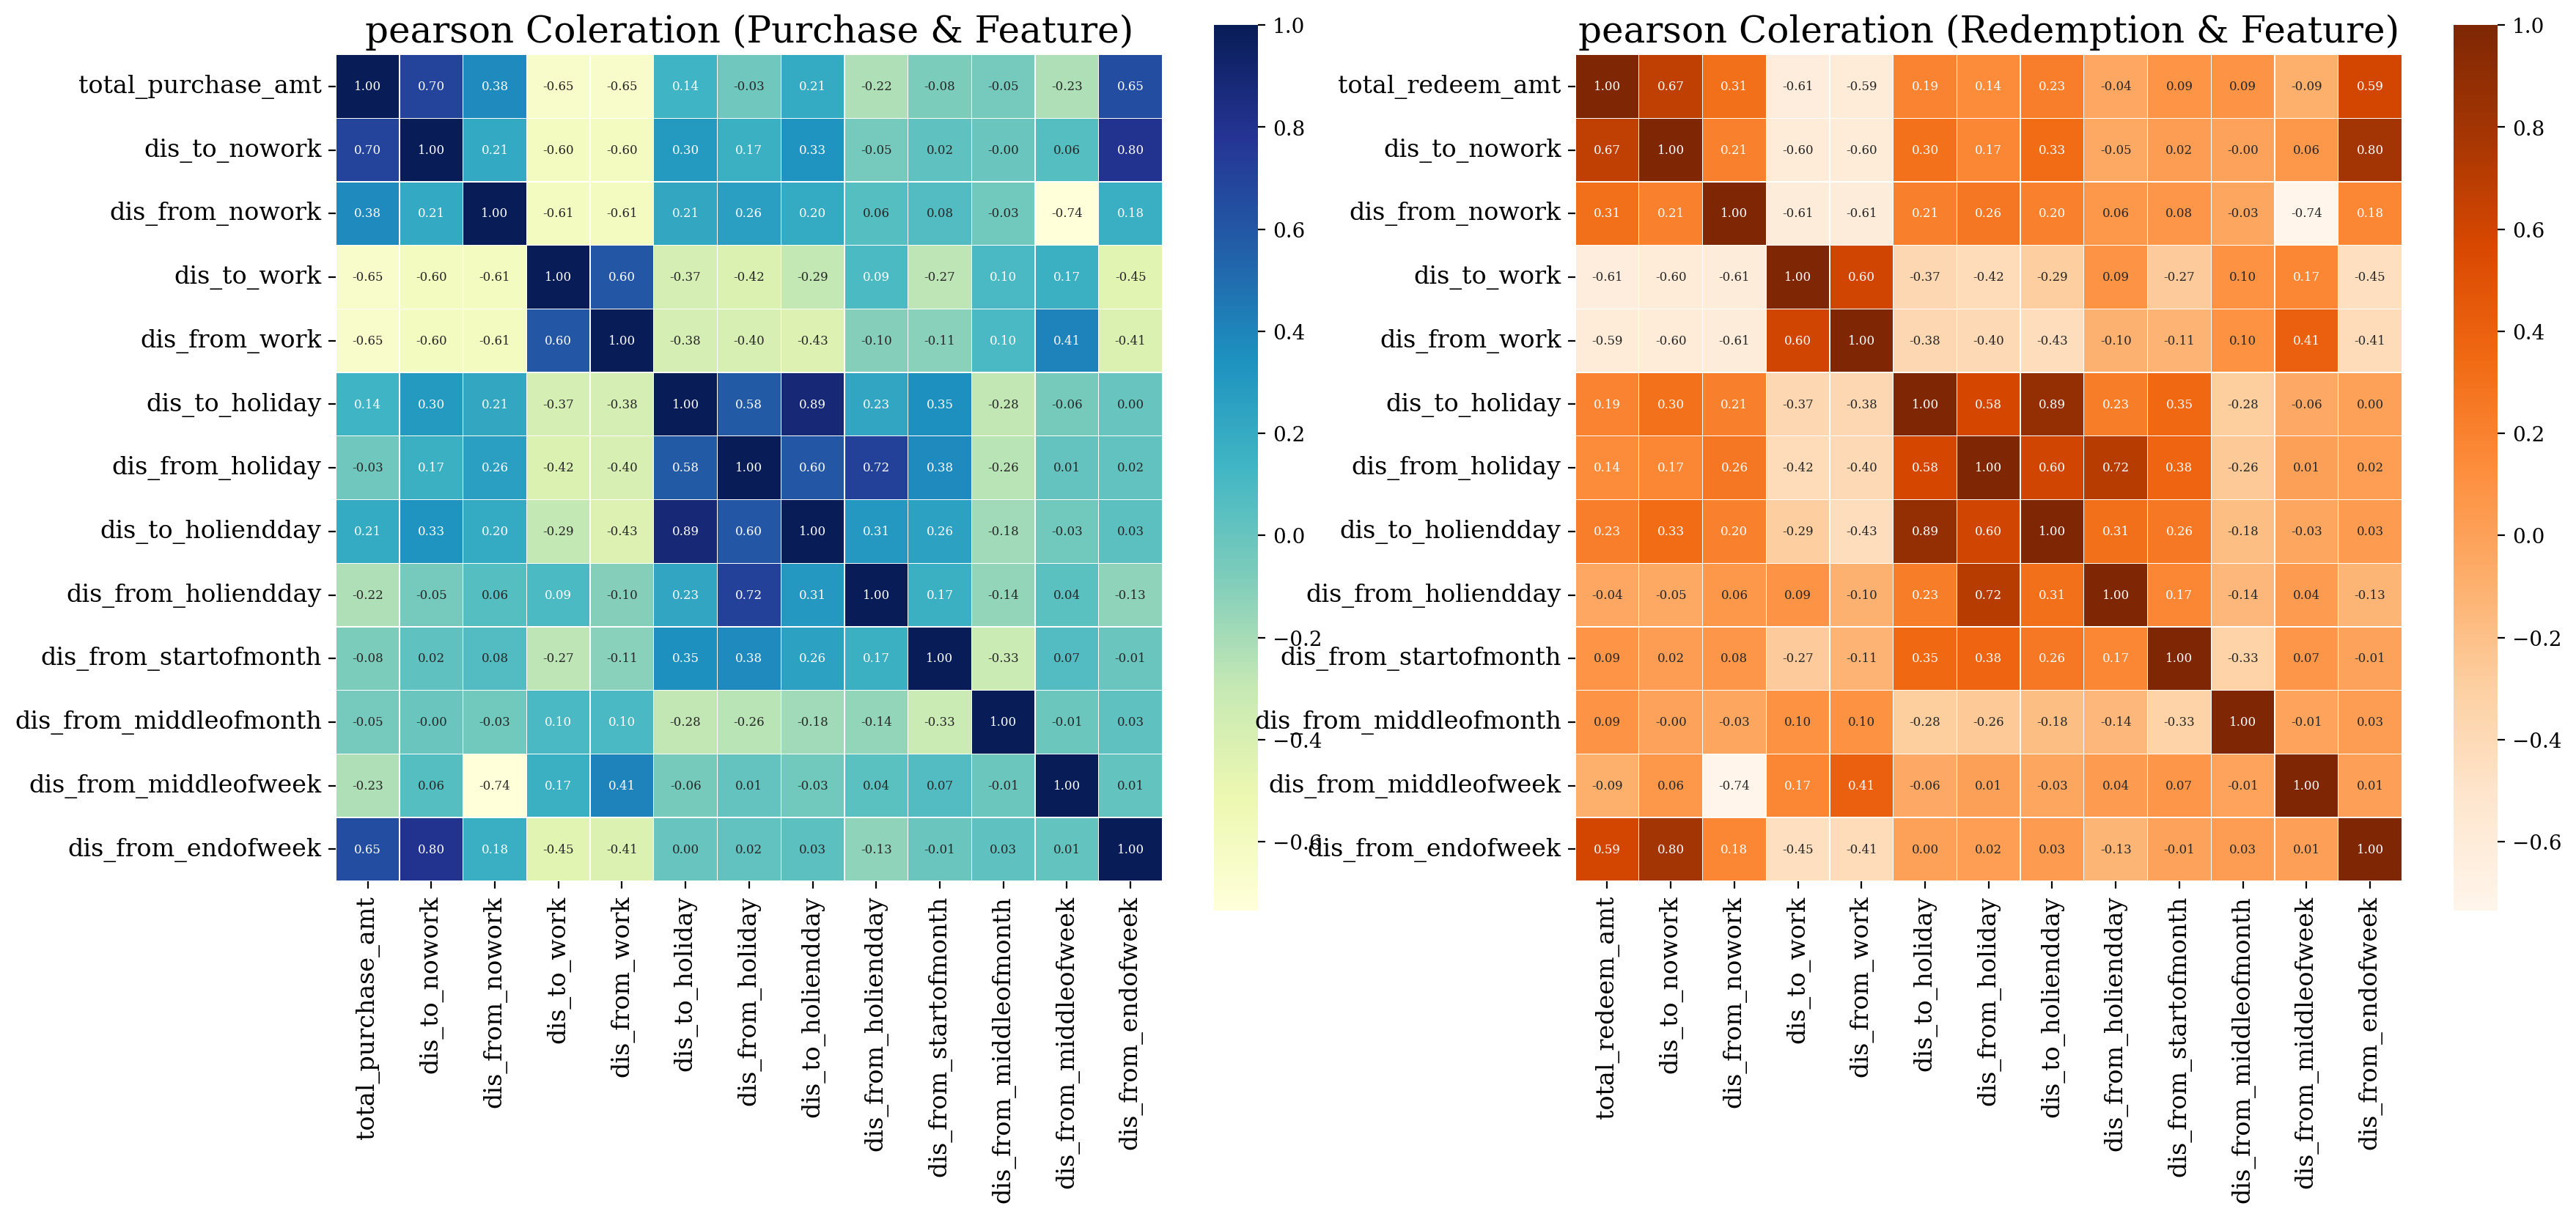

In [ ]:
draw_correlation_heatmap(feature[['total_purchase_amt','total_redeem_amt'] + dis_feature_indexs])

In [ ]:

temp = np.abs(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman')['total_purchase_amt'])
feature_low_correlation1 = set(temp[temp < 0.1].index)

temp = np.abs(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman')['total_redeem_amt'])
feature_low_correlation2 = set(temp[temp < 0.1].index)

print(feature_low_correlation)
feature_low=list(feature_low_correlation1 & feature_low_correlation2)
print(feature_low)
feature_low_correlation += feature_low
feature_low_correlation=list(set(feature_low_correlation))
print(feature_low_correlation)

['is_fourth_week', 'is_firstday_of_month', 'is_lastday_of_workday', 'is_first_week']
['is_lastday_of_workday', 'is_first_week', 'is_fourth_week', 'is_firstday_of_month', 'dis_from_startofmonth']
['is_lastday_of_workday', 'is_first_week', 'is_fourth_week', 'is_firstday_of_month', 'dis_from_startofmonth']


# 三、基于动态时序数据的特征

In [ ]:

#显示Dateframe所有列(参数设置为None代表显示所有行，也可以自行设置数字)
pd.set_option('display.max_columns',None)
#显示Dateframe所有行
pd.set_option('display.max_rows',None)
#设置Dataframe数据的显示长度，默认为50
pd.set_option('max_colwidth',200)
#禁止Dateframe自动换行(设置为Flase不自动换行，True反之)
pd.set_option('expand_frame_repr', False)

'''以星期为周期
统计申购总额的均值、中位数、最大值、最小值、偏度等
'''
def get_amtfeature_with_time(data: pd.DataFrame)->pd.DataFrame:
    df_tmp_ = data[labels + date_indexs + ['date']].copy()
    total_balance = data.copy()
    
    df_tmp_ = df_tmp_[(df_tmp_['date'].dt.date>=datetime.date(2014,3,3))]
    df_tmp_['weekday'] = df_tmp_['date'].dt.weekday + 1
    df_tmp_['week'] = df_tmp_['date'].dt.week - min(df_tmp_['date'].dt.week) + 1#第几周
    df_tmp_['day'] = df_tmp_['date'].dt.day
    df_tmp_['month'] = df_tmp_['date'].dt.month
    df_tmp_.reset_index(inplace=True)
    del df_tmp_['index'] #删除index列

    df_purchase = pd.DataFrame(columns = ['weekday1','weekday2','weekday3','weekday4','weekday5','weekday6','weekday7'])
    df_redeem= pd.DataFrame(columns = ['weekday1','weekday2','weekday3','weekday4','weekday5','weekday6','weekday7'])
    count = 0
    for i in range(len(df_tmp_)):
        df_purchase.loc[count,'weekday'+str(df_tmp_.loc[i,'weekday'])] = df_tmp_.loc[i,'total_purchase_amt']
        if df_tmp_.loc[i,'weekday'] == 7:
            count = count + 1
    df_redeem = pd.DataFrame(columns = ['weekday1','weekday2','weekday3','weekday4','weekday5','weekday6','weekday7'])
    
    count = 0
    for i in range(len(df_tmp_)):
        df_redeem.loc[count,'weekday'+str(df_tmp_.loc[i,'weekday'])] = df_tmp_.loc[i,'total_redeem_amt']
        if df_tmp_.loc[i,'weekday'] == 7:
            count = count + 1
    

    df_tmp_['purchase_weekday_median'] = np.nan
    df_tmp_['purchase_weekday_mean'] = np.nan
    df_tmp_['purchase_weekday_min'] = np.nan
    df_tmp_['purchase_weekday_max'] = np.nan
    df_tmp_['purchase_weekday_std'] = np.nan
    df_tmp_['purchase_weekday_skew'] = np.nan

    df_tmp_['redeem_weekday_median'] = np.nan
    df_tmp_['redeem_weekday_mean'] = np.nan
    df_tmp_['redeem_weekday_min'] = np.nan
    df_tmp_['redeem_weekday_max'] = np.nan
    df_tmp_['redeem_weekday_std'] = np.nan
    df_tmp_['redeem_weekday_skew'] = np.nan

    for i in range(len(df_tmp_)):
       if i > 4*7-1:
          df_tmp_.loc[i,'purchase_weekday_median'] = df_purchase.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].median()
          df_tmp_.loc[i,'purchase_weekday_mean'] = df_purchase.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].mean()
          df_tmp_.loc[i,'purchase_weekday_min'] = df_purchase.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].min() 
          df_tmp_.loc[i,'purchase_weekday_max'] = df_purchase.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].max()  
          df_tmp_.loc[i,'purchase_weekday_std'] = df_purchase.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].std() 
          df_tmp_.loc[i,'purchase_weekday_skew'] = df_purchase.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].skew() 

          df_tmp_.loc[i,'redeem_weekday_median'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].median()
          df_tmp_.loc[i,'redeem_weekday_mean'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].mean()
          df_tmp_.loc[i,'redeem_weekday_min'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].min() 
          df_tmp_.loc[i,'redeem_weekday_max'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].max()  
          df_tmp_.loc[i,'redeem_weekday_std'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].std() 
          df_tmp_.loc[i,'redeem_weekday_skew'] = df_redeem.loc[:df_tmp_.loc[i,'week']-2,'weekday'+str(df_tmp_.loc[i,'weekday'])].skew() 
                                        
    colList = ['purchase_weekday_median','purchase_weekday_mean','purchase_weekday_min','purchase_weekday_max','purchase_weekday_std','purchase_weekday_skew',
          'redeem_weekday_median','redeem_weekday_mean','redeem_weekday_min','redeem_weekday_max','redeem_weekday_std','redeem_weekday_skew']
    total_balance = pd.merge(total_balance, df_tmp_[colList+['day','month']], on=['day','month'], how='left')
    return total_balance

total_balance = get_amtfeature_with_time(total_balance)
# 对动态特征做特殊处理

for i in [x for x in total_balance.columns if '_weekday_' in x and x not in labels + date_indexs]:
    total_balance[i] = total_balance[i].fillna(np.nanmedian(total_balance[i]))

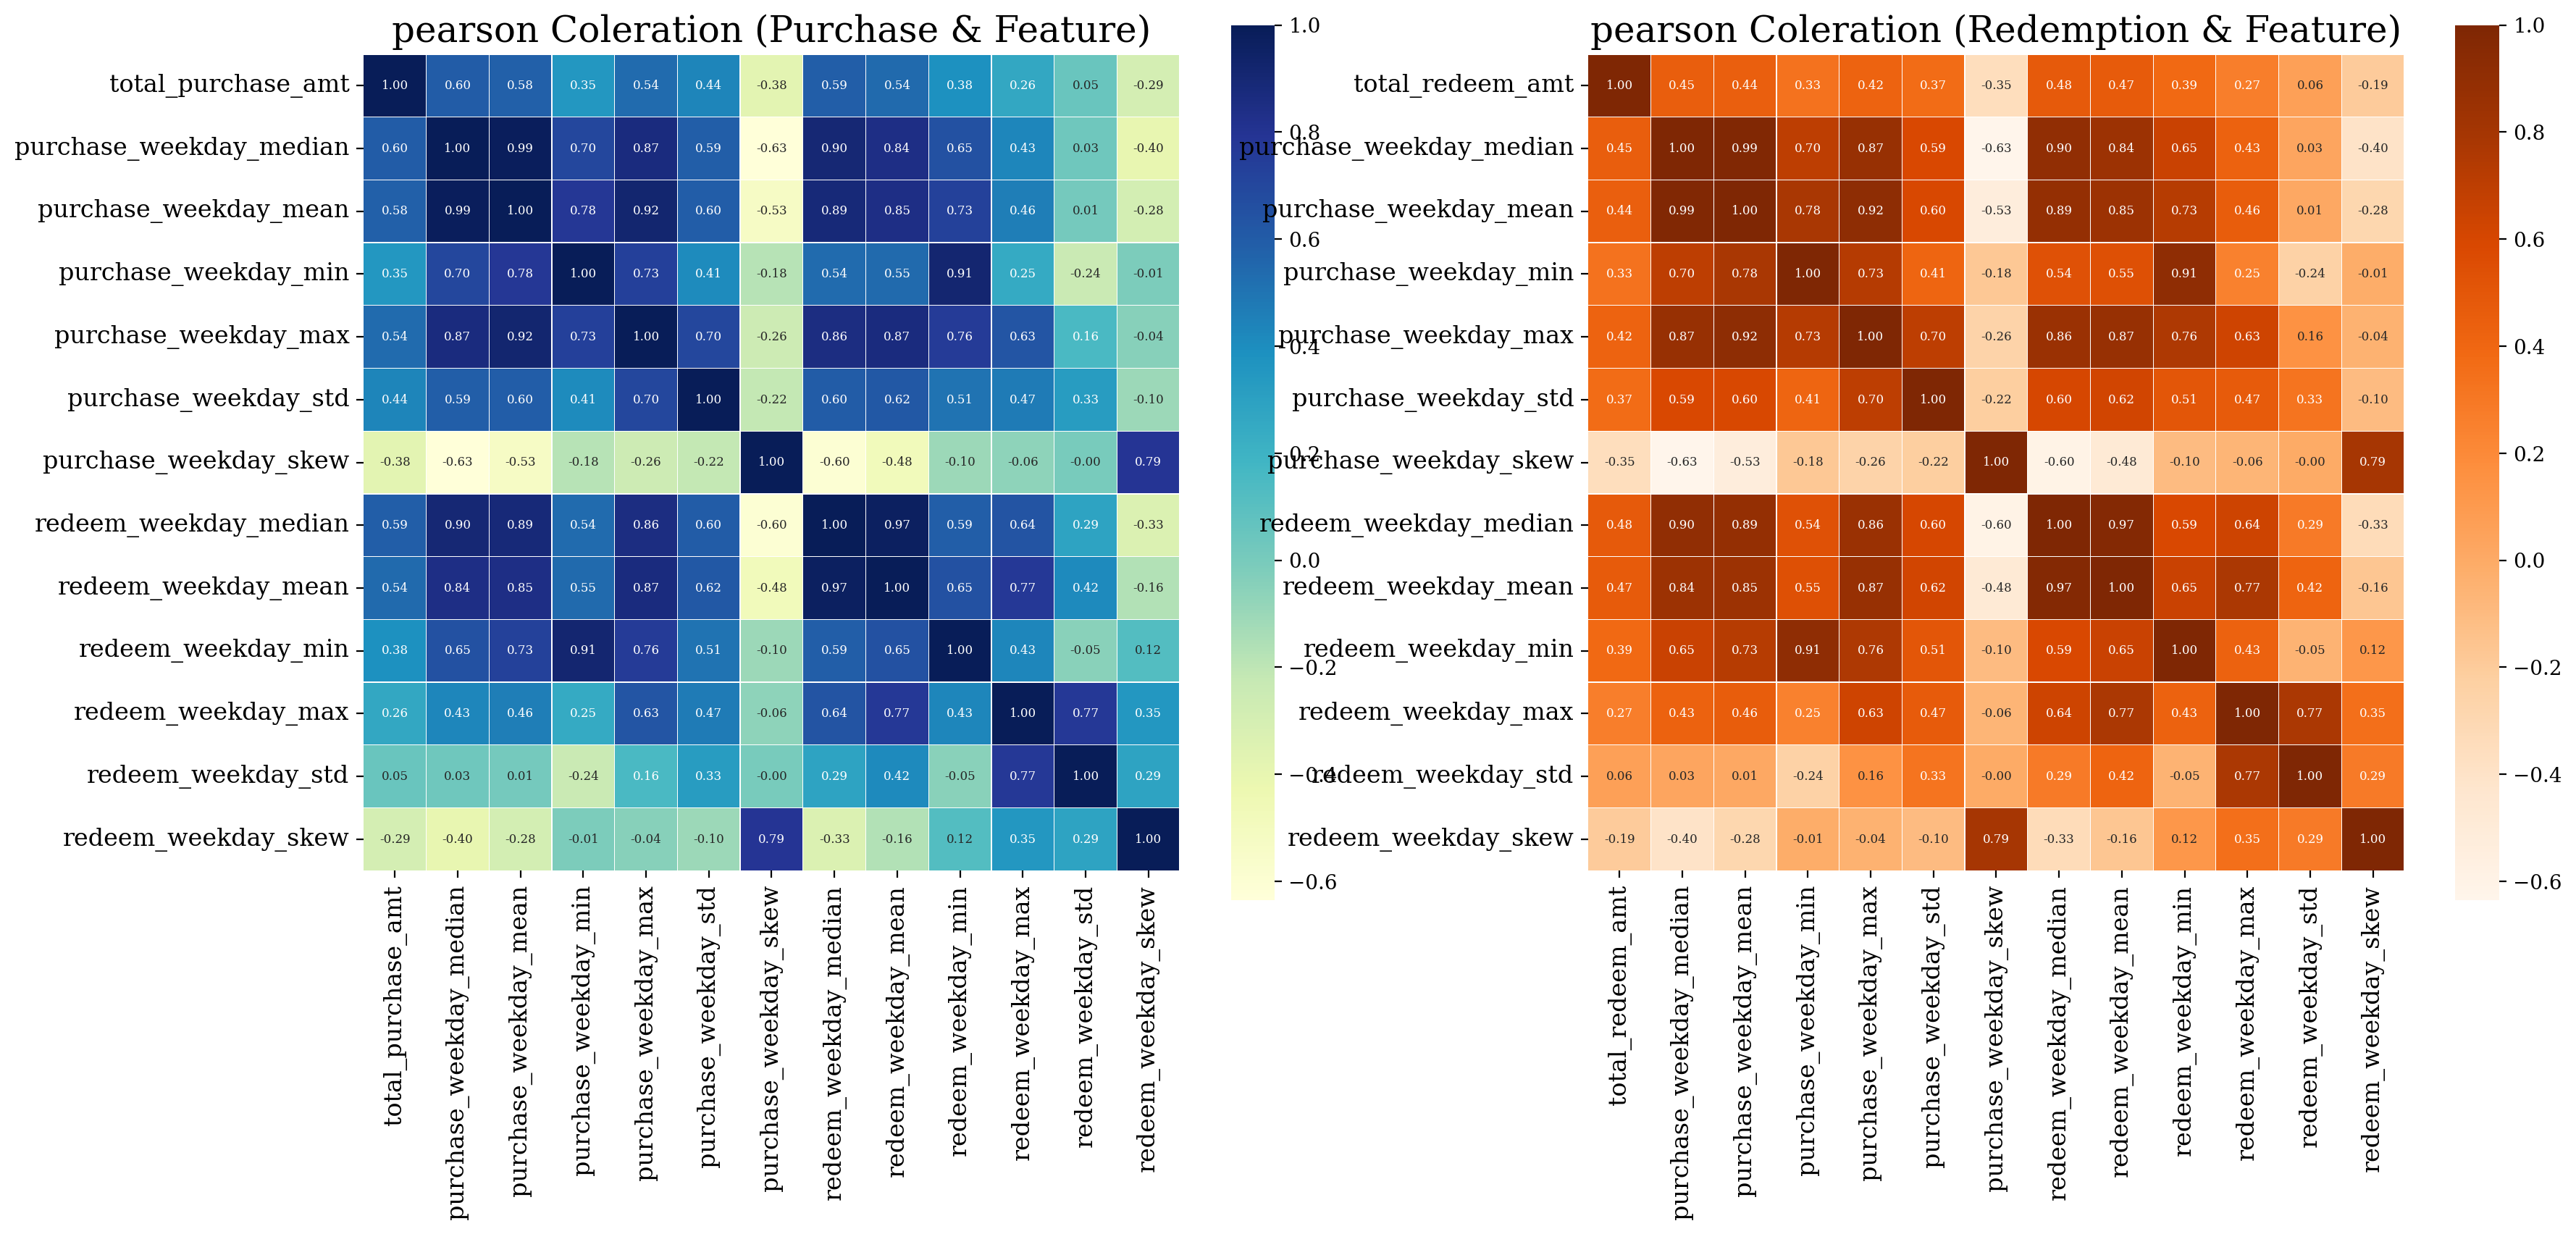

In [ ]:
colList = ['purchase_weekday_median','purchase_weekday_mean','purchase_weekday_min','purchase_weekday_max','purchase_weekday_std','purchase_weekday_skew',
      'redeem_weekday_median','redeem_weekday_mean','redeem_weekday_min','redeem_weekday_max','redeem_weekday_std','redeem_weekday_skew']

draw_correlation_heatmap(total_balance[['total_purchase_amt','total_redeem_amt'] + colList])

In [ ]:
feature = total_balance[[x for x in total_balance.columns if x not in date_indexs]]

temp = np.abs(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman')['total_purchase_amt'])
feature_low_correlation_purchase = set(temp[temp < 0.1].index)

temp = np.abs(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman')['total_redeem_amt'])
feature_low_correlation_redeem = set(temp[temp < 0.1].index)

print(feature_low_correlation_purchase)
print(feature_low_correlation_redeem)

{'is_midmonth', 'is_secday_of_month', 'is_lastday_of_workday', 'is_special_holiday', 'is_first_week', 'dis_from_holiday', 'redeem_weekday_std', 'is_fourth_week', 'is_firstday_of_month', 'dis_from_middleofmonth', 'is_firstday_of_work', 'dis_from_startofmonth'}
{'weekday_Onehot_3', 'dis_from_holiendday', 'is_premonth', 'is_third_week', 'is_worked_yestday', 'is_second_week', 'is_first_week', 'is_lastday_of_workday', 'redeem_weekday_std', 'weekday_Onehot_4', 'is_fourth_week', 'is_firstday_of_month', 'dis_from_startofmonth'}


# 四、特征筛选

1. 剔除相关性较低的特征
2. 对复共线性特征的处理
3. 基于变量重要性的特征筛选


In [ ]:
#先做均值归一化
from sklearn.preprocessing import MinMaxScaler

def Scale(data):
  scaler = MinMaxScaler(feature_range=(0, 1))
  result = scaler.fit_transform(data.reshape(-1, 1))
  return result,scaler

need_scale=[i for i in feature.columns if ("_weekday_" in i) or ("dis_" in i)]
for i in need_scale:
   feature[i],_ =Scale(feature[i].values)

In [ ]:
#剔除相关性较低的特征
purchase_feature = feature[[x for x in feature.columns if (x not in feature_low_correlation_purchase)]]
redeem_feature = feature[[x for x in feature.columns if (x not in feature_low_correlation_redeem)]]

In [ ]:
purchase_cors = purchase_feature.corr()
purchase_cors['total_purchase_amt'] = np.abs(purchase_cors['total_purchase_amt'])
purchase_feature_lists = list(purchase_cors.sort_values(by='total_purchase_amt',ascending=False).index)[2:]
purchase_feature_temp = purchase_feature.dropna()


redeem_cors = redeem_feature.corr()
redeem_cors['total_purchase_amt'] = np.abs(redeem_cors['total_redeem_amt'])
redeem_feature_lists = list(redeem_cors.sort_values(by='total_redeem_amt',ascending=False).index)[2:]
redeem_feature_temp = redeem_feature.dropna()


In [ ]:
def remove_feature(feature_lists,feature_temp,feature):
  thershold = 0.8
  for i in range(len(feature_lists)):
      for k in range(len(feature_lists)-1, -1, -1):
          if i >= len(feature_lists) or k >= len(feature_lists) or i == k:
              break
          if np.abs(np.corrcoef(feature_temp[feature_lists[i]], feature_temp[feature_lists[k]])[0][1]) > thershold:
              higher_feature_temp = feature_temp[feature_lists[i]] * feature_temp[feature_lists[k]]
              if np.abs(np.corrcoef(feature_temp[feature_lists[i]], higher_feature_temp)[0][1]) <= thershold:
                  name = str(feature_lists[i]) + '%%%%' + str(feature_lists[k])
                  print(name)
                  feature_temp[name] = higher_feature_temp
                  feature[name] = feature[feature_lists[i]] * feature[feature_lists[k]]
                  feature_lists.append(name)
              feature_temp = feature_temp.drop(feature_lists[k], axis=1)
              feature_lists.remove(feature_lists[k])
  return feature_lists
# purchase_feature_lists=remove_feature(purchase_feature_lists,purchase_feature_temp,purchase_feature)
# redeem_feature_lists=remove_feature(redeem_feature_lists,redeem_feature_temp,redeem_feature)

purchase_feature_2 = purchase_feature[[x for x in purchase_feature_lists if x not in labels] + labels + ['date']]
redeem_feature_2 = redeem_feature[[x for x in redeem_feature_lists if x not in labels] + labels + ['date']]

In [ ]:
purchase_feature = purchase_feature[[x for x in purchase_feature_lists if x not in labels] + labels + ['date']]
redeem_feature = redeem_feature[[x for x in redeem_feature_lists if x not in labels] + labels + ['date']]

In [ ]:
def split_data_offline(data):
    trainset = data[(datetime.date(2014,4,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,8,1))]
    testset = data[(datetime.date(2014,8,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    return trainset, testset

In [ ]:
purchase_train, purchase_test=split_data_offline(purchase_feature)
redeem_train, redeem_test=split_data_offline(redeem_feature)

#purchase linear
model = LinearRegression()
model.fit(purchase_train[purchase_feature_lists], purchase_train['total_purchase_amt'])
perm = PermutationImportance(model, random_state=1126).fit(purchase_test[purchase_feature_lists], purchase_test['total_purchase_amt'])
liner_important_purchase = pd.DataFrame(np.abs(perm.feature_importances_), [x for x in purchase_feature_lists]).reset_index()
eli5.show_weights(perm, feature_names=list(str(x) for x in purchase_feature_lists))

Weight,Feature
1.7920 ± 0.2840,purchase_weekday_median
1.0448 ± 0.3925,dis_to_work
0.9404 ± 0.2568,redeem_weekday_mean
0.8538 ± 0.6170,purchase_weekday_max
0.7658 ± 0.2240,purchase_weekday_min
0.6330 ± 0.3049,purchase_weekday_skew
0.1802 ± 0.0890,redeem_weekday_median
0.1800 ± 0.1581,is_gonna_work_tomorrow
0.1782 ± 0.1257,redeem_weekday_min
0.1471 ± 0.2328,weekday_Onehot_4


In [ ]:
#保存前20重要特征
feature_num=20
purchase_liner_important = liner_important_purchase.sort_values(0, ascending=False).reset_index(drop=True)
purchase_liner_important = list(liner_important_purchase[:feature_num]['index'])

In [ ]:
#redeem linear
model = LinearRegression()
model.fit(redeem_train[redeem_feature_lists],  redeem_train['total_redeem_amt'])
perm = PermutationImportance(model, random_state=1126).fit(redeem_test[redeem_feature_lists], redeem_test['total_redeem_amt'])
liner_important_purchase = pd.DataFrame(np.abs(perm.feature_importances_), [x for x in redeem_feature_lists]).reset_index()
eli5.show_weights(perm, feature_names=list(str(x) for x in redeem_feature_lists))

Weight,Feature
14489080902.5800 ± 7342948946.4872,is_work
7953672265.5869 ± 2357238069.7831,dis_to_work
1971716778.3566 ± 512332713.4387,dis_from_work
364595964.7559 ± 8156.1289,is_gonna_work_tomorrow
13.9731 ± 3.8551,purchase_weekday_max
8.2645 ± 4.7957,purchase_weekday_mean
1.6236 ± 0.6554,redeem_weekday_mean
1.2618 ± 0.5459,purchase_weekday_skew
1.0586 ± 0.6771,dis_from_nowork
0.4557 ± 0.3441,purchase_weekday_std


In [ ]:
#保存前20重要特征
redeem_liner_important = liner_important_purchase.sort_values(0, ascending=False).reset_index(drop=True)
redeem_liner_important = list(liner_important_purchase[:feature_num]['index'])

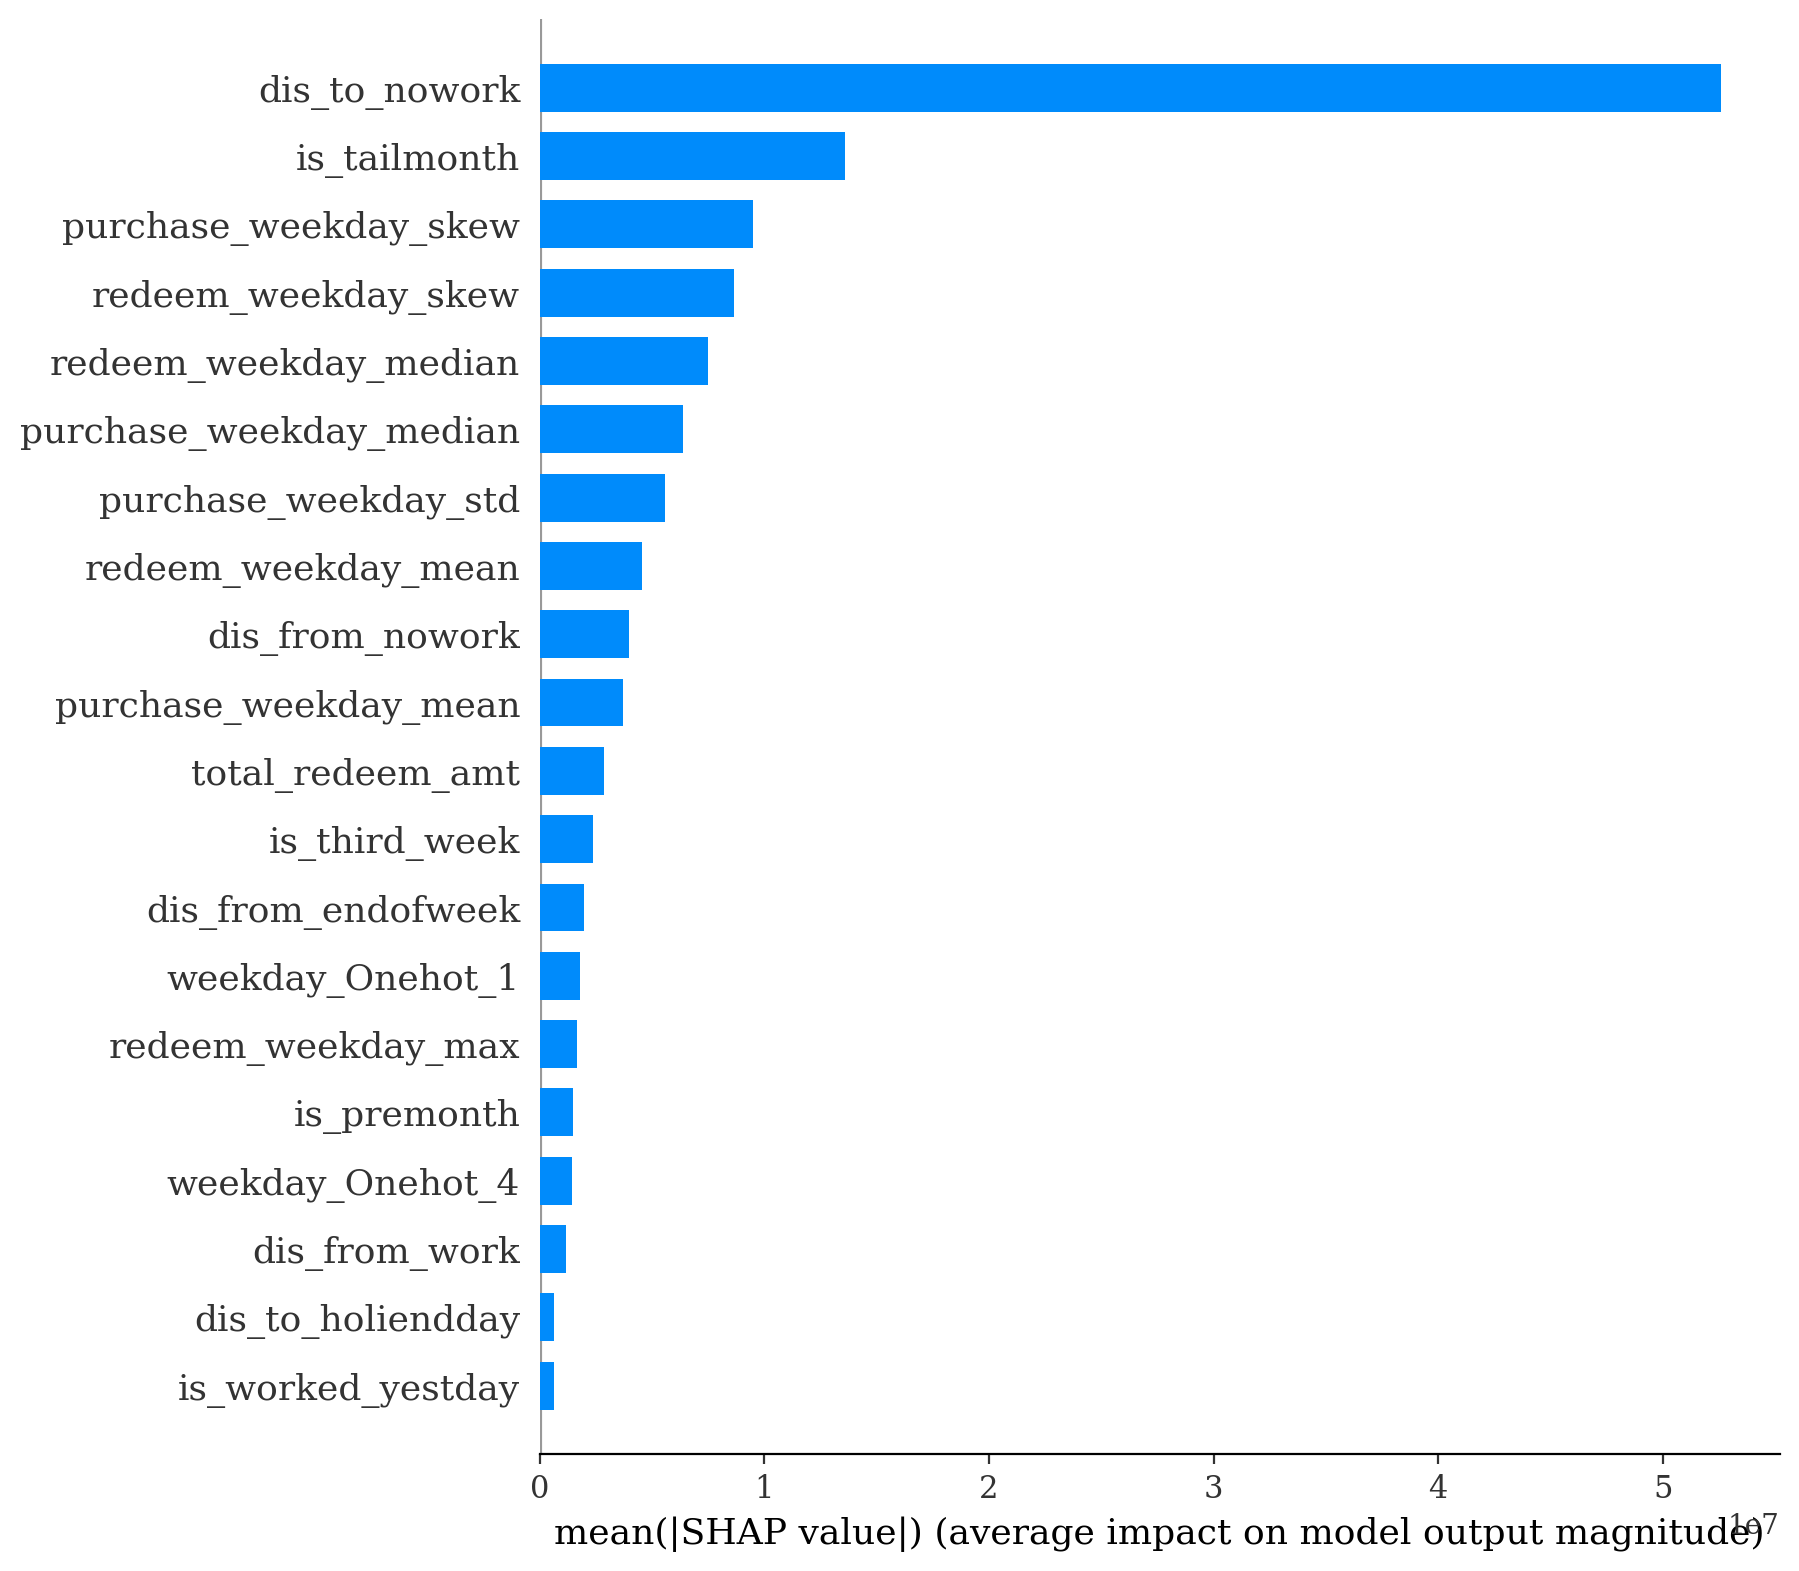

In [ ]:
import xgboost as xgb
shap.initjs()
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(purchase_train[purchase_feature_lists], purchase_train['total_purchase_amt'])
explainer = shap.TreeExplainer(model)
shap_testues1 = explainer.shap_values(purchase_test[purchase_feature_lists])
purchase_tree_important = pd.DataFrame(np.mean(np.abs(shap_testues1), axis=0),[x for x in purchase_feature_lists]).reset_index()

fig = plt.figure(figsize=(10,4),dpi=200)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
shap.summary_plot(shap_testues1, purchase_test[purchase_feature_lists], plot_type='bar')

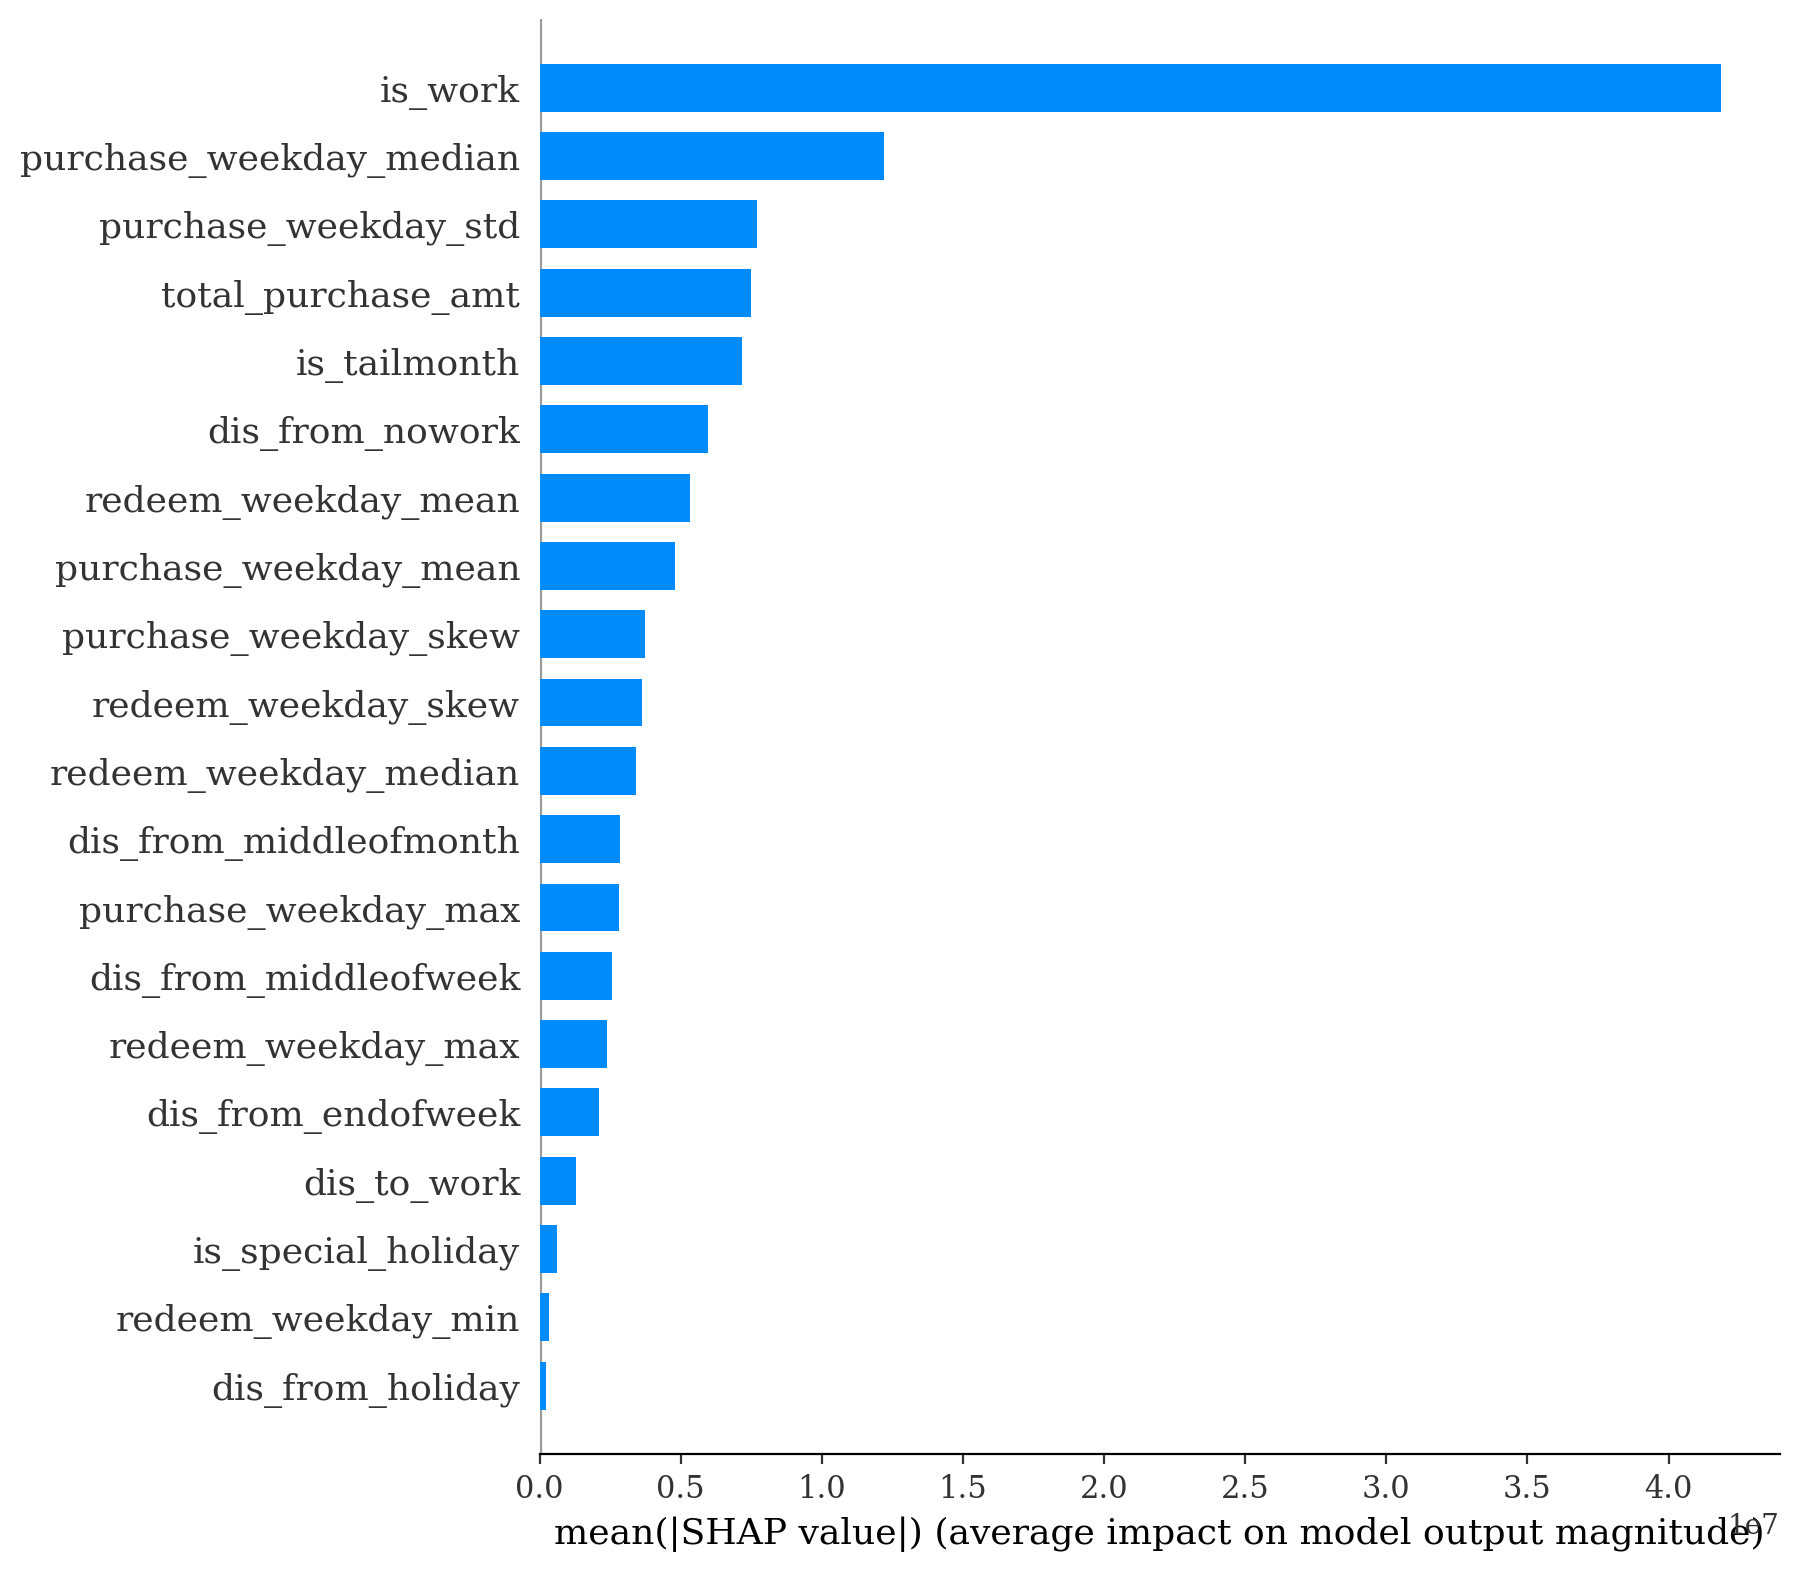

In [ ]:
shap.initjs()
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(redeem_train[redeem_feature_lists], redeem_train['total_redeem_amt'])
explainer = shap.TreeExplainer(model)
shap_testues2 = explainer.shap_values(redeem_test[redeem_feature_lists])
redeem_tree_important = pd.DataFrame(np.mean(np.abs(shap_testues2), axis=0),[x for x in redeem_feature_lists]).reset_index()

fig = plt.figure(figsize=(10,4),dpi=200)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
shap.summary_plot(shap_testues2, redeem_test[redeem_feature_lists], plot_type='bar')

In [ ]:
purchase_features_purchase = list(set(purchase_tree_important['index'].tolist()) & set(purchase_liner_important))
redeem_features_purchase = list(set(redeem_tree_important['index'].tolist()) & set(redeem_liner_important))

print(purchase_features_purchase)
print(redeem_features_purchase)


purchase_feature_selected = purchase_feature[[x for x in purchase_features_purchase if x not in labels] + labels + ['date']]
redeem_feature_selected = redeem_feature[[x for x in redeem_features_purchase if x not in labels] + labels + ['date']]

['purchase_weekday_skew', 'dis_to_nowork', 'purchase_weekday_std', 'purchase_weekday_mean', 'total_redeem_amt', 'redeem_weekday_min', 'purchase_weekday_max', 'weekday_Onehot_6', 'is_gonna_work_tomorrow', 'dis_from_endofweek', 'dis_from_nowork', 'purchase_weekday_min', 'redeem_weekday_mean', 'dis_to_work', 'purchase_weekday_median', 'is_holiday', 'dis_from_work', 'redeem_weekday_median', 'weekday_Onehot_5', 'is_weekend']
['weekday_Onehot_1', 'purchase_weekday_std', 'purchase_weekday_mean', 'redeem_weekday_min', 'is_work', 'purchase_weekday_max', 'dis_to_holiendday', 'total_purchase_amt', 'dis_to_holiday', 'redeem_weekday_max', 'dis_from_endofweek', 'weekday_Onehot_2', 'weekday_Onehot_0', 'dis_from_nowork', 'purchase_weekday_min', 'redeem_weekday_mean', 'is_tailmonth', 'purchase_weekday_median', 'redeem_weekday_median', 'is_special_holiday']


In [ ]:
purchase_feature.to_csv('/content/drive/MyDrive/DATA/Feature/purchase_feature.csv',index=False)
redeem_feature.to_csv('/content/drive/MyDrive/DATA/Feature/redeem_feature.csv',index=False)

purchase_feature_2.to_csv('/content/drive/MyDrive/DATA/Feature/purchase_feature2.csv',index=False)
redeem_feature_2.to_csv('/content/drive/MyDrive/DATA/Feature/redeem_feature2.csv',index=False)

purchase_feature_selected.to_csv('/content/drive/MyDrive/DATA/Feature/purchase_feature_selected.csv',index=False)
redeem_feature_selected.to_csv('/content/drive/MyDrive/DATA/Feature/redeem_feature_selected.csv',index=False)

# 五、建模、预测

In [ ]:
import pandas as pd
import sklearn as skr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from typing import *
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1126)

labels = ['total_purchase_amt', 'total_redeem_amt']

In [ ]:
# 分割数据集

interval=[datetime.date(2014, 8, 1), datetime.date(2014, 7, 15), datetime.date(2014, 7, 1), datetime.date(2014, 6, 15), 
          datetime.date(2014, 6, 1),]

def split_data_offline(data: pd.DataFrame)->pd.DataFrame:
    trainset = data[(datetime.date(2014,3,31) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,8,1))]
    testset = data[(datetime.date(2014,8,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    return trainset, testset

def split_data_online(data: pd.DataFrame)->pd.DataFrame:
    trainset = data[(datetime.date(2014,3,31) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    testset = data[(datetime.date(2014,9,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,10,1))]
    return trainset, testset

# 在不同的时间段对模型进行验证
def week_evalution_single(data: pd.DataFrame, model: object, types: str)->pd.DataFrame:
    results = []
    a_month = relativedelta(months=1)
    for i in interval:
        trainset = data[(i - 4 * a_month <= data['date'].dt.date) & (data['date'].dt.date < i)]
        testset = data[(i <= data['date'].dt.date) & (data['date'].dt.date < i + a_month)]
        if len(testset) == 0 or len(trainset) == 0:
            i = datetime.date(2014, 4, 20)
            trainset = data[(i - 4 * a_month <= data['date'].dt.date) & (data['date'].dt.date < i)]
            testset = data[(i <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014, 9, 1))]
        feature = [x for x in trainset.columns if x not in ['total_purchase_amt','total_redeem_amt','date']]
        
        model.fit(X=trainset[feature], y=trainset['total_' + types + '_amt'])
        result_lr = model.predict(testset[feature])
        
        h = 0.3
        results.append(sum(AE(testset['total_' + types + '_amt'], result_lr).apply(lambda x : np.exp(-x/h))*10))
    return pd.DataFrame(results)

# 输出评级表格
def draw_eva_table(df: pd.DataFrame)->pd.DataFrame:
    rest = df.copy()
    rest['interval'] = interval
    # rest['interval'] = [datetime.date(2014, 8, 1), datetime.date(2014, 7, 25), datetime.date(2014, 7, 18), datetime.date(2014, 7, 11), 
    #   datetime.date(2014, 7, 4), datetime.date(2014, 6, 27), datetime.date(2014, 6,20),]
    return rest
    
# 生成线上结果

def generate_online_result(df: pd.DataFrame, feature: Iterable, model = LinearRegression(), target:str = 'total_purchase_amt')->Iterable:
    trainset, testset = split_data_online(df)
    model.fit(X=trainset[feature], y=trainset[target])
    result_purchase_lr = model.predict(testset[feature])
    return result_purchase_lr

def generate_off_result(df: pd.DataFrame, feature: Iterable, model = LinearRegression(), target:str = 'total_purchase_amt')->Iterable:
    trainset, testset = split_data_offline(df)
    model.fit(X=trainset[feature], y=trainset[target])
    result_purchase_lr = model.predict(testset[feature])
    return result_purchase_lr

# 重载DataFrame加法
def add_two_df(df1, df2, features = None, left_a = 0.45, right_a = 0.55):
    data = df1.copy()
    if not features:
        features = [x for x in data.columns if x != 'interval']
    for i in features:
        data[i] = (data[i] * left_a + df2[i] * right_a)
    return data

def multi_model_eva(data, types:str = 'purchase'):
    results = pd.DataFrame()
    for model in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')]:
        if results.empty:
            results = draw_eva_table(week_evalution_single(data, model, types)).rename(columns={0: repr(model).split('(')[0]})
        else:
            results = pd.merge(results,draw_eva_table(week_evalution_single(data, model, types)).rename(columns={0: repr(model).split('(')[0]}), on='interval')
    results = results[['interval'] + [x for x in results.columns if x != 'interval']]
    return results


# 1. 利用剔除相关性较低特征后的特征集

In [ ]:
data_purchase = pd.read_csv('/content/drive/MyDrive/DATA/Feature/purchase_feature.csv')
data_purchase['date'] = pd.to_datetime(data_purchase['date'])

data_redeem = pd.read_csv('/content/drive/MyDrive/DATA/Feature/redeem_feature.csv')
data_redeem['date'] = pd.to_datetime(data_redeem['date'])


for model in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')]:
  result_purchase_lr = generate_online_result(data_purchase, [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model,'total_purchase_amt')
  result_redeem_lr = generate_online_result(data_redeem, [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model,'total_redeem_amt')
  test_user = pd.DataFrame({'report_date': [20140900 + i for i in range(1, 31)]})
  test_user['purchase'] = result_purchase_lr
  test_user['redeem'] = result_redeem_lr
  test_user.to_csv('/content/drive/MyDrive/DATA/'+str(model)+'_result.csv', encoding='utf-8', index=None, header=None)

#Linear finalScore:130.9889

In [ ]:
# 平均结果110-115

# 2. 利用优胜特征集

In [ ]:
data_purchase = pd.read_csv('/content/drive/MyDrive/DATA/Feature/purchase_feature_selected.csv')
data_purchase['date'] = pd.to_datetime(data_purchase['date'])

data_redeem = pd.read_csv('/content/drive/MyDrive/DATA/Feature/redeem_feature_selected.csv')
data_redeem['date'] = pd.to_datetime(data_redeem['date'])

In [ ]:
add_two_df(multi_model_eva(data_purchase, 'purchase'), multi_model_eva(data_redeem, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,186.214792,142.017327,186.333932,193.631967,173.877770,192.437469
1,2014-07-15,172.702441,166.689510,171.918397,174.889203,170.446660,178.791489
2,2014-07-01,182.290869,145.941780,152.884479,151.590528,150.629188,154.731745
3,2014-06-15,153.368074,158.899768,159.191248,161.332239,129.985072,157.645482
4,2014-06-01,151.501149,152.237326,168.439200,161.153053,152.730473,159.274510


In [ ]:
for model in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')]:
  result_purchase_lr = generate_online_result(data_purchase, [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model,'total_purchase_amt')
  result_redeem_lr = generate_online_result(data_redeem, [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], model,'total_redeem_amt')
  test_user = pd.DataFrame({'report_date': [20140900 + i for i in range(1, 31)]})
  test_user['purchase'] = result_purchase_lr
  test_user['redeem'] = result_redeem_lr
  test_user.to_csv('/content/drive/MyDrive/DATA/'+str(model)+'_result.csv', encoding='utf-8', index=None, header=None)

#XGBregression 131.6676

# xgboost调参

In [ ]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
"""
下面部分为调试参数的代码
"""
need_to_select_params= [{'n_estimators': [25,50,75,100,125,150,175,200]},
             {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]},
             {'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
             {'subsample': [0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9,1]},
             {'reg_alpha': [0,0.05, 0.1, 1, 2, 3], 'reg_lambda': [0,0.05, 0.1, 1, 2, 3]},
             {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.12,0.15,0.2]}]

best_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 1, 'seed': 0,
        'subsample': 1, 'colsample_bytree': 1, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1,}

def select_params(cv_params, other_params):
  model = xgb.XGBRegressor(objective='reg:squarederror',**other_params)
  optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=-1)
  optimized_GBM.fit(X_train, y_train)
  evalute_result = optimized_GBM.cv_results_['mean_test_score']
  for i in range(len(optimized_GBM.best_params_.keys())):
    other_params[list(optimized_GBM.best_params_.keys())[i]]=list(optimized_GBM.best_params_.values())[i]

trainset_purchase, testset_purchase = split_data_online(data_purchase)
X_train=trainset_purchase[[x for x in data_purchase.columns if x not in['total_purchase_amt','total_redeem_amt','date']]]
y_train=trainset_purchase['total_purchase_amt']
for j in need_to_select_params:
  select_params(j,best_params)
purchase_best_params = best_params


best_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 1, 'seed': 0,
        'subsample': 1, 'colsample_bytree': 1, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1,}

trainset_redeem, testset_redeem = split_data_online(data_redeem)
X_train=trainset_redeem[[x for x in data_redeem.columns if x not in['total_purchase_amt','total_redeem_amt','date']]]
y_train=trainset_redeem['total_redeem_amt']
for j in need_to_select_params:
  select_params(j,best_params)
redeem_best_params = best_params



print(purchase_best_params)
print(redeem_best_params)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Fitting 10 folds for each of 7 candidates, totalling 70 fits
{'learning_rate': 0.1, 'n_estimators': 75, 'max_depth': 3, 'min_child_weight': 5, 'seed': 0, 'subsample': 0.7, 'colsample_bytree': 1, 'gamma': 0, 'reg_alpha': 2, 'reg_lambda': 1}
{'learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 3, 'min_child_weight'

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror',**purchase_best_params)  
X_train=trainset_purchase[[x for x in data_purchase.columns if x not in['total_purchase_amt','total_redeem_amt','date']]]
y_train=trainset_purchase['total_purchase_amt']
X_test=testset_purchase[[x for x in data_purchase.columns if x not in['total_purchase_amt','total_redeem_amt','date']]]
model.fit(X_train, y_train)
result_purchase_lr = model.predict(X_test)

model = xgb.XGBRegressor(objective='reg:squarederror',**redeem_best_params) 
X_train=trainset_redeem[[x for x in data_redeem.columns if x not in['total_purchase_amt','total_redeem_amt','date']]]
y_train=trainset_redeem['total_redeem_amt']
X_test=testset_redeem[[x for x in data_redeem.columns if x not in['total_purchase_amt','total_redeem_amt','date']]]
model.fit(X_train, y_train)
result_redeem_lr = model.predict(X_test)

test_user = pd.DataFrame({'report_date': [20140900 + i for i in range(1, 31)]})
test_user['purchase'] = result_purchase_lr
test_user['redeem'] = result_redeem_lr
test_user.to_csv('/content/drive/MyDrive/DATA/Grid_result.csv', encoding='utf-8', index=None, header=None)